<a href="https://colab.research.google.com/github/yahyahabib65/AI-623/blob/main/AI_623_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.1

In [2]:
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import requests
import torch

Configuring ViT Model

In [3]:
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name,attn_implementation='eager')


processor = ViTImageProcessor.from_pretrained(model_name)


url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfxynjA0LTbcNblMTC6oghFNInK8vyFJojvQ&s'
image = Image.open(requests.get(url, stream=True).raw)


inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs, output_attentions=True)

# [cite_start]5. Record the top-1 prediction [cite: 51]
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]

print(f"Top-1 Prediction: {predicted_label}")



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Top-1 Prediction: airliner


In [4]:
# For Landscape Image
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name,attn_implementation='eager')


processor = ViTImageProcessor.from_pretrained(model_name)


url = 'https://media.istockphoto.com/id/485371557/photo/twilight-at-spirit-island.jpg?s=612x612&w=0&k=20&c=FSGliJ4EKFP70Yjpzso0HfRR4WwflC6GKfl4F3Hj7fk='
image = Image.open(requests.get(url, stream=True).raw)


inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs, output_attentions=True)

# [cite_start]5. Record the top-1 prediction [cite: 51]
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]

print(f"Top-1 Prediction: {predicted_label}")



Top-1 Prediction: monitor


Based on the prediction. its accurate but when performed on another image say landscape it fails miserably. and it is observed that

## 2.2

In [5]:
import matplotlib.pyplot as plt
import numpy as np

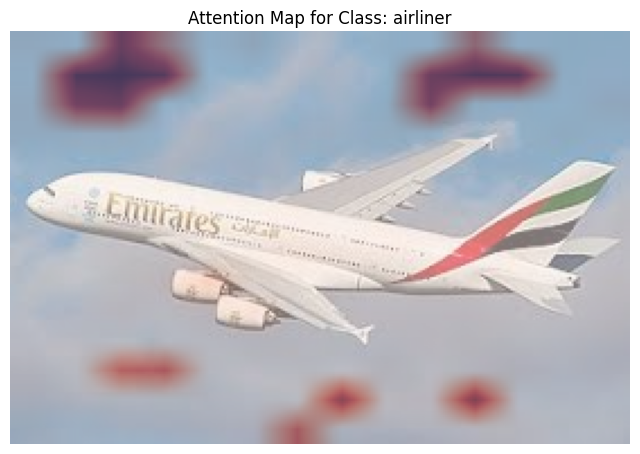

In [ ]:
# 2. Run Inference with output_attentions=True
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

# 3. Extract Attention Matrix
# picking the last layer i.e [-1].
# should look like this i.e (batch_size, num_heads, seq_len, seq_len)
last_layer_attentions = outputs.attentions[-1]

# 4. Aggregate Heads
attentions_averaged = torch.mean(last_layer_attentions, dim=1)

# 5.
cls_attention = attentions_averaged[0, 0, 1:]

# 6. Reshaping into 2D Grid
grid_size = int(np.sqrt(cls_attention.shape[0]))
attention_map = cls_attention.reshape(grid_size, grid_size)

# 7. Visualization
attention_map_input = attention_map.unsqueeze(0).unsqueeze(0)
attention_map_resized = torch.nn.functional.interpolate(
    attention_map_input, size=(image.height, image.width), mode='bilinear', align_corners=False
)
# Resizing for plot
attention_map_resized = attention_map_resized.squeeze().numpy()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(image)
ax.imshow(attention_map_resized, cmap='Reds', alpha=0.5) # Semi-transparent red overlay
ax.axis('off')
ax.set_title(f"Attention Map for Class: {model.config.id2label[outputs.logits.argmax(-1).item()]}")
plt.show()

## 2.3